# 1. Research Question (prepare problem).

With this project I am awnswering what has the biggest impact on heart faliture and if it is possible to predict this with a given number of parameters.

## 1.1 Dataset

Dataset comes from [here](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved 6/11/2021 from [https://www.kaggle.com/fedesoriano/heart-failure-prediction.](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Data discussion

In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Print where file is being found.
print("Search file in", os.getcwd())

# Define dataframe and print head.
df = pd.read_csv("heart_failure_dataset.csv")
df.head()

# Save data df.to_csv("./data/data2.xlsx")

Search file in C:\Users\finnn\Documents\GitHub\AI


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2.1 Summerize data

### 2.1.1. Dimensions

In [11]:
print("Shape:",df.shape)

Shape: (918, 12)


#### Observation
Below is showing that there is 918 rows with 12 attributes. This also shows us the averages for each quantile.

### 2.1.2. Peek 

In [12]:
print(df.head(1))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  


#### Observation
Below shows a peek which takes the first row. This shows the different attributes such as age, chestpain and the end result for heart disease.

### 2.1.3. Statistical summary

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Observations
Above shows that there are 918 observations. As seen the mean age of each patient has an average age of 53, with a minimum age of 28 and max of 77. In the 50% quantile of age it is shown the age is 54, which shows in terms of age is slightly scewed to older patients. In the lower 25% quantile the age is 47, showing again a scew towards older patients. 

In this statsitcal summary it is also shwon that the lower 25% of patients do not have heart disease. This is shown in the mean for this collumn bing 0.55.

# 2.2 Data visualizations
Below is data visualisations looking into the dataset.


## 2.2.1 Univariate 
Below is an overview of the histograms realting to each variable.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

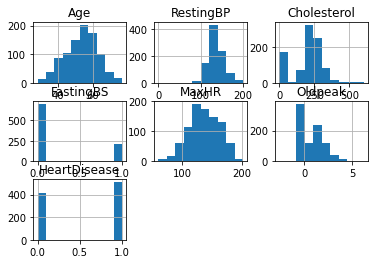

In [14]:
df.hist()

### 2.2.1.1 Age histogram

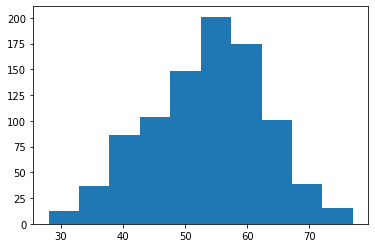

In [15]:
# Age histrogram

plt.hist(df["Age"])
df.dropna(inplace=True)
plt.show()

#### Observations
Below shows the distribution of the age variable. This shows that there is a slight positive scew.

### 2.2.1.2 Heart Disease

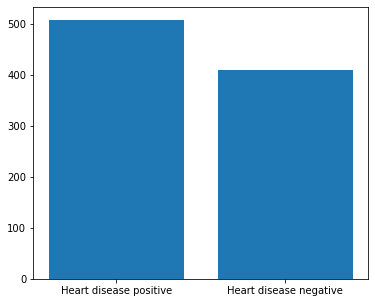

In [16]:
# Counts number of positive cases and negative cases more info 

barDataArray = [df['HeartDisease'].value_counts()[1], df['HeartDisease'].value_counts()[0]]
barNames = ('Heart disease positive', 'Heart disease negative')
# Create a range of number of bar names.
y_pos = np.arange(len(barNames))

# Add bar data
plt.bar(y_pos, barDataArray)

# Add bar labels
plt.xticks(y_pos, barNames)

# Change size
plt.gcf().set_size_inches(6, 5)

# Show graphic
plt.show()

# More info: https://towardsdatascience.com/change-figure-size-matplotlib-11a409f39584
# https://www.width.ai/pandas/count-specific-value-in-column-with-pandas

#### Observations
With the histogram above his dataset is showing that there is a positive screw towards patients with heart disease.

### 2.2.1.3 Chest pain type

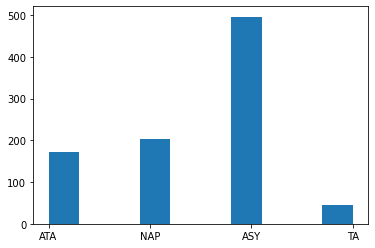

In [17]:
plt.hist(df["ChestPainType"])
df.dropna(inplace=True)

plt.show()

#### Observations
Above show that a signifficant number of patients are diagnosed witgh ASY symptoms

### 2.2.1.4 Cholesterol

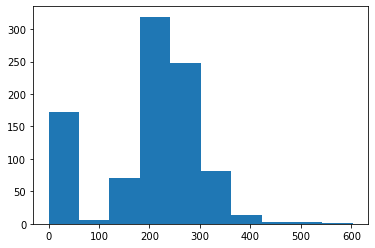

In [18]:
plt.hist(df["Cholesterol"])
df.dropna(inplace=True)
plt.show()

#### Observations
Above shows that a number of patients show **0** cholesterol. 

### 2.2.1.5 Exercise Angina

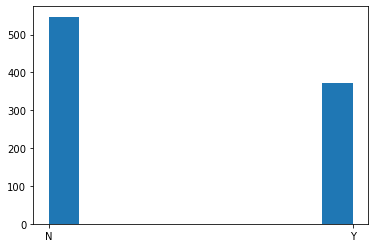

In [19]:
plt.hist(df["ExerciseAngina"])
df.dropna(inplace=True)
plt.show()

#### Observations
Above shows that angina (chest pain) brought on by exercise below is not signifficant.

### 2.2.1.6 Gender

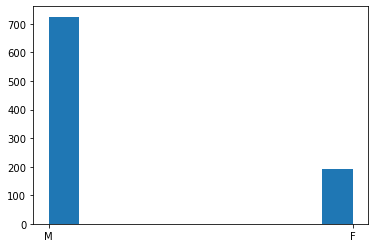

In [20]:
plt.hist(df["Sex"])
df.dropna(inplace=True)
plt.show()

#### Observations
Above shows there is a signifficant number more males in this dataset than females.

This removes the ability to comapre the differences between gender and heart disease.

## 2.2.2 Multivariate plots

### Correlation matrix plot

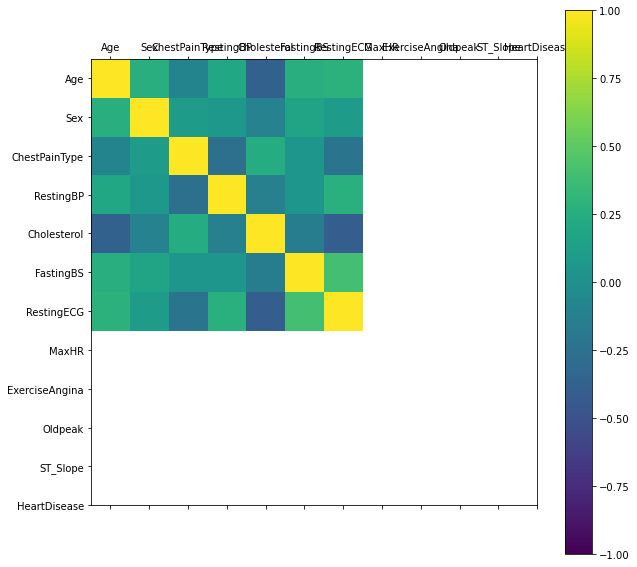

In [44]:
# Correlation Matrix Plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# df = pd.read_excel("./data/data_select.xlsx")
names = df.columns
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

#### Observations
As there is a lot of catigorical data it makes it difficult to draw corilations. However, this means I am looking for assosiation rather than corrilation. 

https://www.quora.com/Can-I-use-Pearsons-correlation-with-categorical-variables

### Scatter matrix

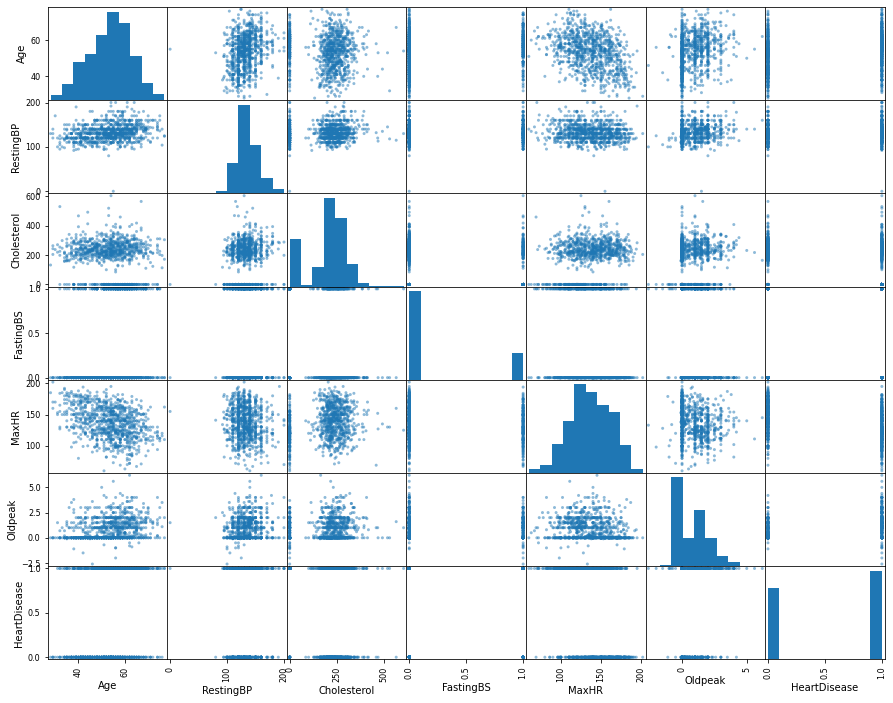

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.plotting.scatter_matrix(df, figsize=(15,12))
plt.show()

### Observations

* There is a negative corilation with MaxHR and age.  
* There is a slight positive corilation with age and resting BP.  
* There is a slight positive corilation between Cholestrol and Resting BP. Because your heart has to work harder.  


## Preprocessing 0&1
Changing M and F into 0 and 1  
Change chest pain to ATA, NAP, ASY and TA  
Changing resting ECG 3 categories Normal, ST and LVH.  
Exercise Exercise Angina to 0 and 1  
Change ST_Slope to 3 categories UP Down and Flat  

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart_failure_dataset.csv")

#Remove missing values df.dropna(inplace=True)
#print(n-df.shape[0], "Observation(s) with NaNs deleted")

#1 for males.
df["Male"]=np.where(df["Sex"]=="M",1,0)

df["ATAChestPain"]=np.where(df["ChestPainType"]=="ATA", 1,0)
df["NAPChestPain"]=np.where(df["ChestPainType"]=="NAP", 1,0)
df["ASYChestPain"]=np.where(df["ChestPainType"]=="ASY", 1,0)
df["TAChestPain"]=np.where(df["ChestPainType"]=="TA", 1,0)

df["RestECGNORM"]=np.where(df["RestingECG"]=="Normal", 1,0)
df["RestECGST"]=np.where(df["RestingECG"]=="ST", 1,0)
df["RestECGLVH"]=np.where(df["RestingECG"]=="LVH", 1,0)

df["ExerciseAngina"]=np.where(df["ExerciseAngina"]=="Y", 1,0)

df["FlatSTSlope"]=np.where(df["ST_Slope"]=="Flat", 1,0)
df["UPSTSlope"]=np.where(df["ST_Slope"]=="Up", 1,0)
df["DownSTSlope"]=np.where(df["ST_Slope"]=="Down", 1,0)

# unchanged variables

df[["Age", "Male", "ATAChestPain", "NAPChestPain", "ASYChestPain", "TAChestPain", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "RestECGNORM", "RestECGST", "RestECGLVH", "ExerciseAngina", "Oldpeak", "FlatSTSlope", "UPSTSlope", "DownSTSlope", "HeartDisease"]].to_csv("processed_heart_failure_data.csv", index=False)
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ATAChestPain,NAPChestPain,ASYChestPain,TAChestPain,RestECGNORM,RestECGST,RestECGLVH,FlatSTSlope,UPSTSlope,DownSTSlope
0,40,M,ATA,140,289,0,Normal,172,0,0.0,...,1,0,0,0,1,0,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,...,0,1,0,0,1,0,0,1,0,0
2,37,M,ATA,130,283,0,ST,98,0,0.0,...,1,0,0,0,0,1,0,0,1,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,...,0,0,1,0,1,0,0,1,0,0
4,54,M,NAP,150,195,0,Normal,122,0,0.0,...,0,1,0,0,1,0,0,0,1,0


## Running seaborn pairplot of classification variables
https://seaborn.pydata.org/generated/seaborn.pairplot.html

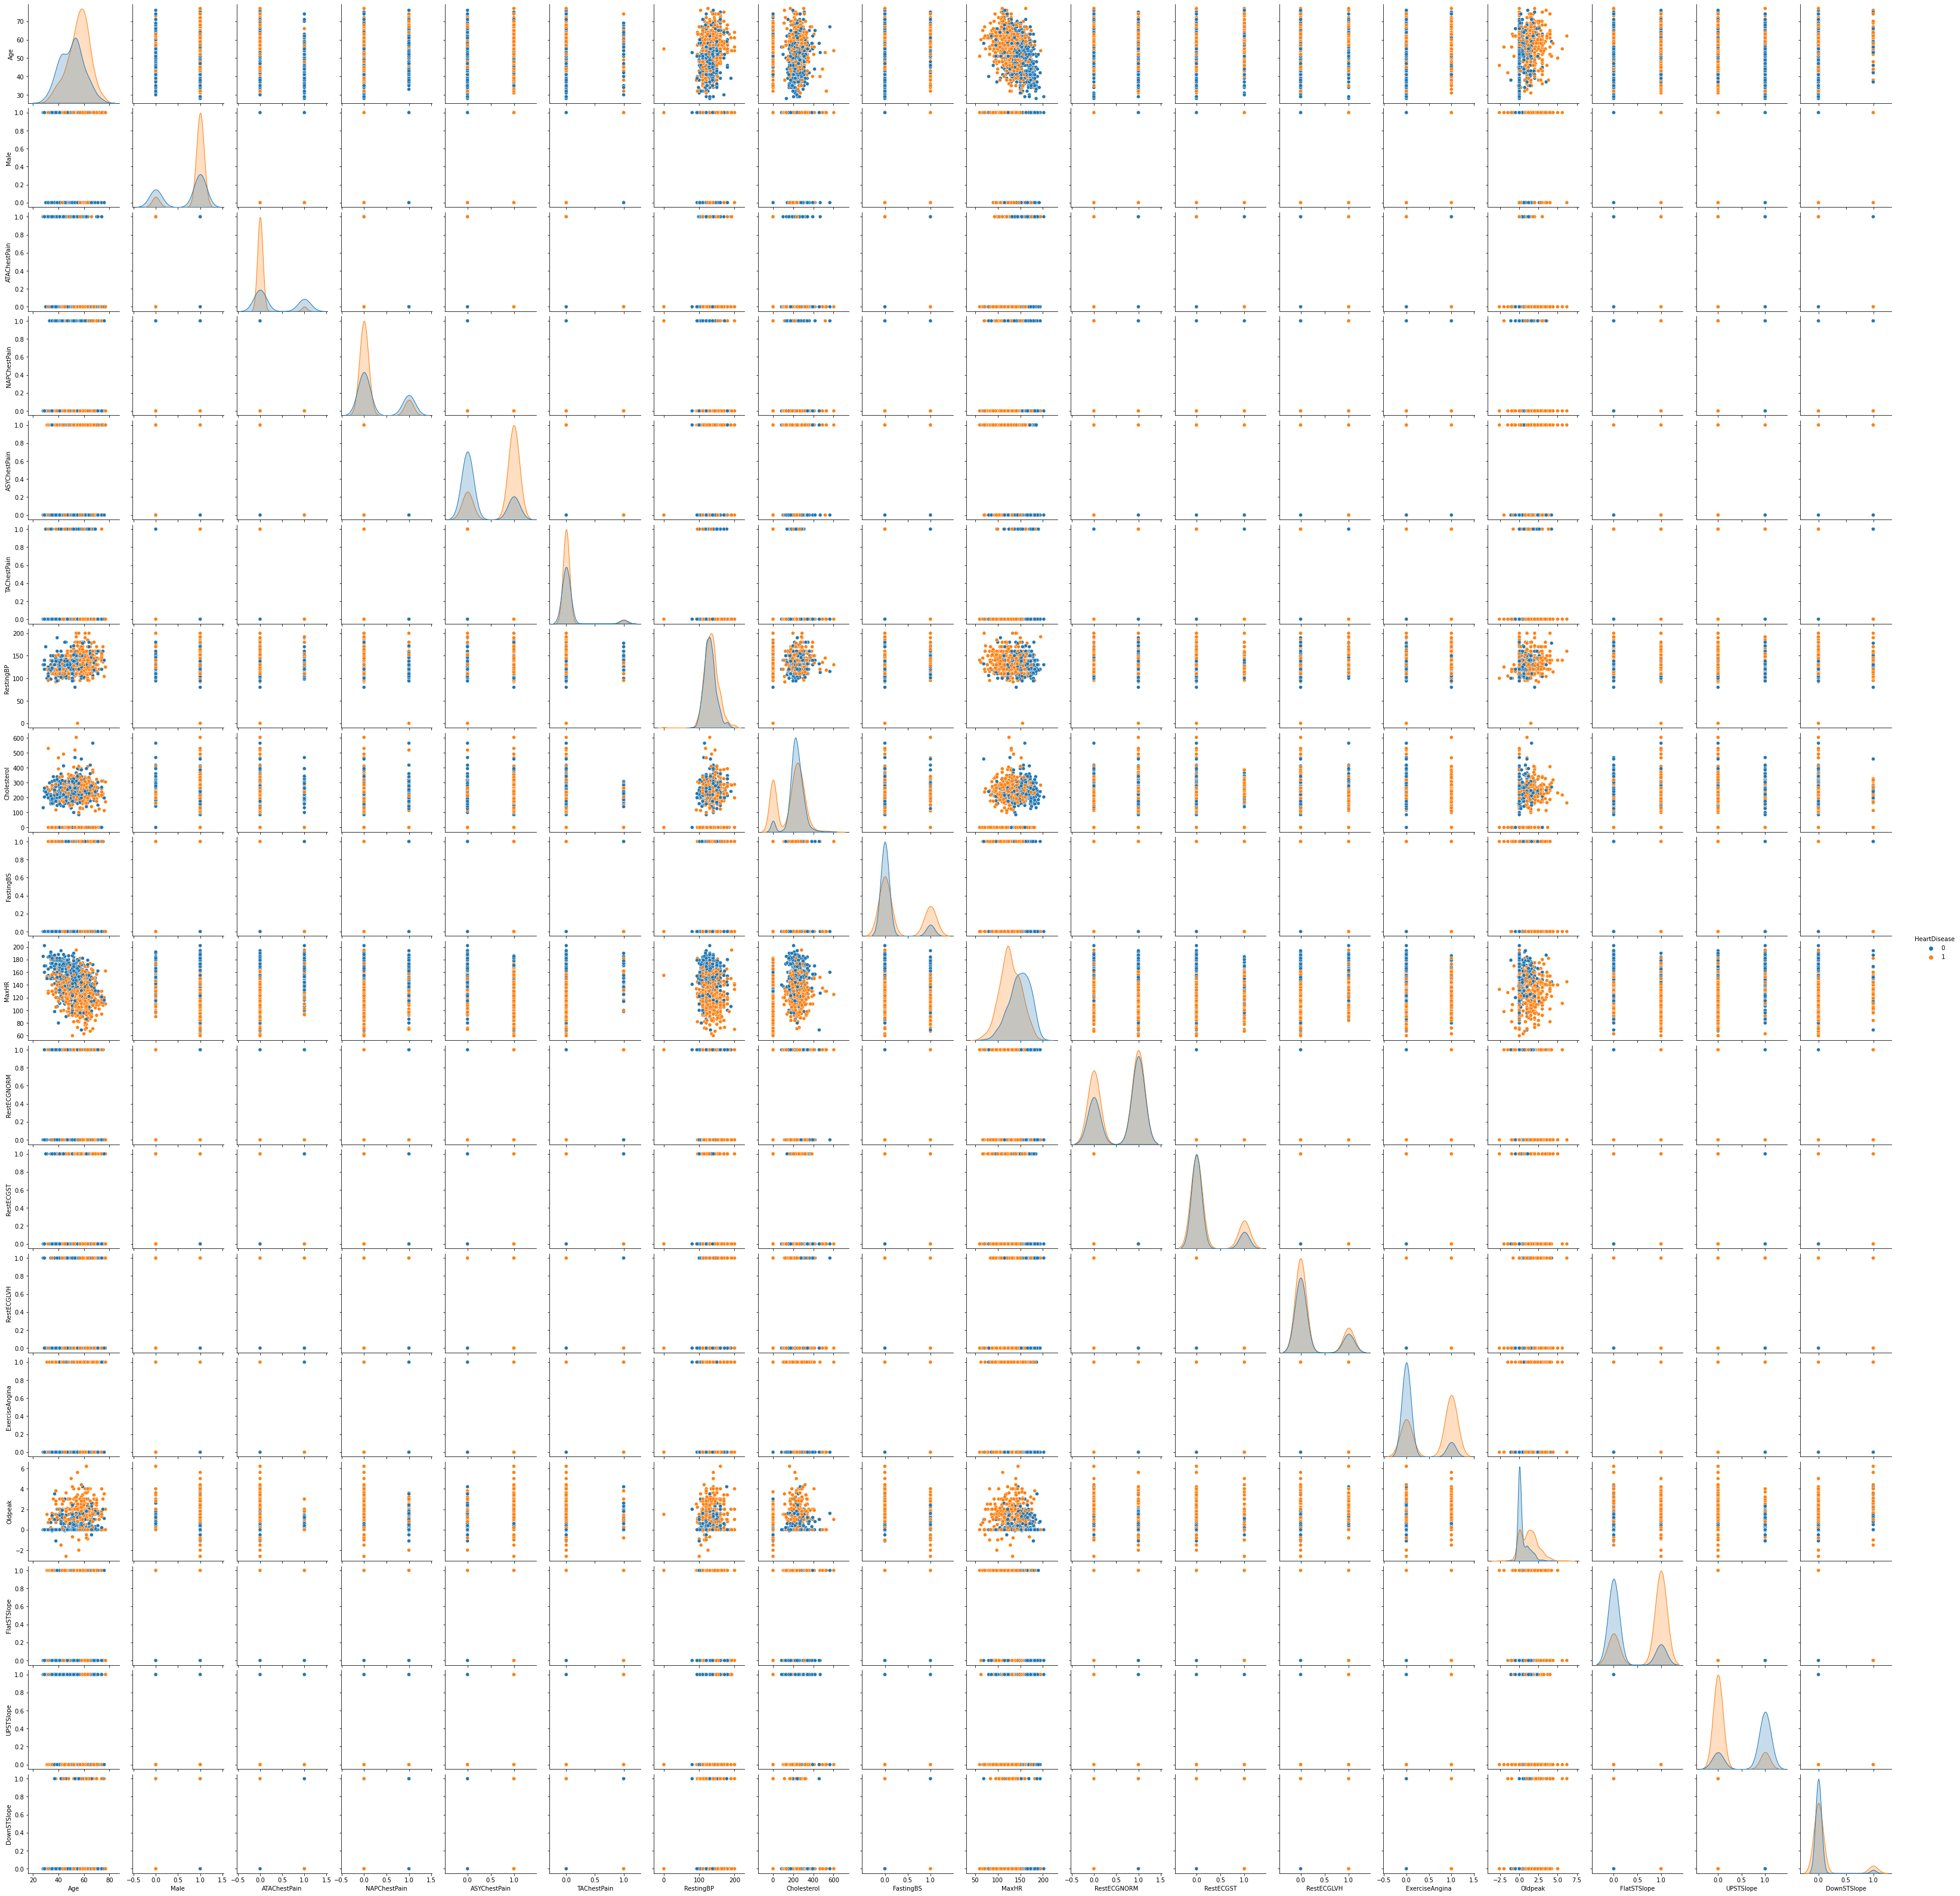

In [58]:
df = pd.read_csv("processed_heart_failure_data.csv")
sns.pairplot(df, hue="HeartDisease")

### Obervations

# 3. Visualisation

# 4. Analysis 
(The rest can be breif but this one should be the main part)
Analyse - What did you predict and how did you predict it




### Predictions

In [12]:
# Cross Validation Classification Report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

df = pd.read_csv("heart_failure_dataset.csv")
array = df.values

X = array[:,0:-1]
Y = array[:,-1]
print(X) # All data without termination
print(Y) # Termination

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted_prob = model.predict_proba(X_test)
predicted = np.where(predicted_prob[:,0] > 0.7,0,1)
report = classification_report(Y_test, predicted)
print(report)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]
[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

ValueError: could not convert string to float: 'M'


**Generate average from kniown data and put that in the field with 0. This will elminate any impact they have.**

**Run with average put in.**

**Are people without data systimatically differently.**

# 5. Results